To calculate the probability of an agent at the boundary of a circle of radius R
with an angle of vision 45 degrees, seeing the centre of a target of radius delta.

r = R-delta
centre of target must be on or inside circle of radius r.

Lines defining area of vision of the agent are
y=x/2+R and y=-(x/2+R) (assume that the agent is at the edge of the circle radius R, x =0).

centre of the target can be anywhere with a circle of radius r (inside the circle of radius R) except in the sectors above and below where those lines (the chords) intersect the circle.


If S1 and S2 are the areas above those chords, then S1=S2=S say. If A is the area of the circle of radius r,  then probability of agent seeing target is
(A-2S)/A

In [1]:
#Try to draw an example
import numpy as np 
import matplotlib.pyplot as plt
import math
R=10
delta = 2

r=R-delta

xmin = -(R+2)  
xmax = R+2
ymin = -(R+2)
ymax = (R+2)

def line1(x):
    return (x+R)/2

def line2(x):
    return (-x-R)/2

def create_circle(x0,y0,rad,str):
    circle= plt.Circle((x0,y0), radius= rad, fill=False, color = str)
    return circle

def create_line(m,c,x0,x1): #create line y=mx + c, from x=x0 to x=x1
    y0=m*x0 + c
    y1=m*x1 + c
    line = plt.plot([x0, y0], [x1, y0], 'g')
    plt.setp(line, linewidth=1.0)
    return line

    



#plt.plot()
#plt.show()


The points of intersection of line 1 are:

(-7.932958789676531,1.0335206051617347)

(3.9329587896765306,6.966479394838265)

The points of intersection of line 2 are:

(-7.932958789676531,-1.0335206051617347)

(3.9329587896765306,-6.966479394838265)



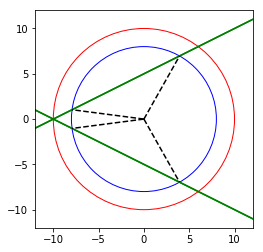

In [2]:


def solve_quadratic(a,b,c):
    #print("a,b and c are: " + str(a) + "," + str(b) + "," + str(c))
    solns = []
    val1 = -b/(2*a)
    val2 = ((b*b) - 4*a*c)
    val3 = ((b*b) - 4*a*c)/(4*a*a)
    #print("val2 is " + str(val2))
    if val3<0:
        print("No solutions to quadratic")
    else:
        val4= math.sqrt(val3)
        solns.append(val1-val4)
        solns.append(val1+val4)
    
    return solns

def sector_angle(y0,y1,r):
    theta0 = math.degrees(math.asin(y0/r))
    #print("theta_0 is " + str(theta0))
    theta1 = math.degrees(math.asin(y1/r))
    #print("theta_1 is " + str(theta1))
    theta = 180 - theta0 - theta1
    return theta


def sector_area(theta,r):
    return (theta*math.pi*r*r)/float(360)

def circular_area(r):
    return math.pi*r*r

def isosceles_area(theta,r):
    return (r*r*math.fabs(math.cos(theta/2)*math.sin(theta/2)))

def find_probability(R,d):
    #for given radii of outer circle (R) and target (d)
    #return a comma-separated string consisting of:
    #R, d, p
    #where p is the probability of agent seeing the target
    
    r=float(R-d)
    s=str(R) + "," + str(d) + ","
    solns = solve_quadratic(1.25,float(R/2),float(((R*R)/4) - r*r))
    
    if solns==[]:
        return s+str(1.0)
    
    x0=solns[0]
    x1=solns[1]
    y0=line1(x0)
    y1=line1(x1)
    outer_circular_area = circular_area(R)
    inner_circular_area = circular_area(r)
    theta = sector_angle(y0,y1,r)
    sect_area = sector_area(theta,r)
    isos_area = isosceles_area(theta,r)
    chord_area = sect_area - isos_area
    
    
    viewable = inner_circular_area - 2*chord_area 
    prob_view = viewable/inner_circular_area
    return s+str(prob_view)
    
    
        
        


#start the main program here
    
solns0 = solve_quadratic(1.25,float(R/2),float(((R*R)/4) - r*r))

if solns0==[]:
    exit()
    

x00=solns0[0]
x10=solns0[1]

y00=line1(x00)
y10=line1(x10)
print("The points of intersection of line 1 are:\n")
print("(" + str(x00) + "," + str(y00) + ")\n")
print("(" + str(x10) + "," + str(y10) + ")\n")


y01=line2(x00)
y11=line2(x10)
print("The points of intersection of line 2 are:\n")
print("(" + str(x00) + "," + str(y01) + ")\n")
print("(" + str(x10) + "," + str(y11) + ")\n")
    
circle1 = create_circle(0,0,R,'r')
circle2 = create_circle(0,0,r,'b')

ax = plt.gca();
ax.add_artist(circle1); 
ax.add_artist(circle2);
ax.set_xlim(xmin, xmax); 
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')
    
plt.plot([xmin, xmax],[line1(xmin),line1(xmax)],'g')
plt.plot([xmin, xmax],[line1(xmin),line1(xmax)],'g')
plt.plot([xmin, xmax],[line2(xmin),line2(xmax)],'g')
plt.plot([xmin, xmax],[line2(xmin),line2(xmax)],'g')

plt.plot([0,x00],[0,y00],'k--')
plt.plot([0,x10],[0,y10],'k--')
plt.plot([0,x00],[0,y01],'k--')
plt.plot([0,x10],[0,y11],'k--')


plt.savefig('example1.png')    
plt.show()

The viewable area is bounded by the green lines and the blue circle

In [3]:

    
outer_circular_area = circular_area(R)
inner_circular_area = circular_area(r)
theta = sector_angle(y00,y10,r)
sect_area = sector_area(theta,r)
isos_area = isosceles_area(theta,r)
chord_area = sect_area - isos_area
    
    
viewable = inner_circular_area - 2*chord_area #the area in which centre of the target can be placed to be viewable by the agent
prob_view = viewable/inner_circular_area
    
print("The area of the large circle is " + str(outer_circular_area))
print("The area of the small circle is " + str(inner_circular_area))
print("The angle between the points of intersection is " + str(theta))
print("The area of the sector is " + str(sect_area))
print("The area of the isosceles is " + str(isosceles_area))
print("The area of each chord is " + str(chord_area))
print("The area viewable to the agent is " + str(viewable))
print("The probability that a target is viewable to the agent is " + str(prob_view))

The area of the large circle is 314.1592653589793
The area of the small circle is 201.06192982974676
The angle between the points of intersection is 112.02431283704217
The area of the sector is 62.56617924129715
The area of the isosceles is <function isosceles_area at 0x7fb6f4ab7bf8>
The area of each chord is 34.44945084192594
The area viewable to the agent is 132.16302814589488
The probability that a target is viewable to the agent is 0.6573249757316395


Now find the probability for a range of values, without the comments

In [4]:
f = open("example1_data.txt", 'w')

R=20
while R<101:
    d=5
    while d<=R/2:
        newString = find_probability(R,d) + "\n"
        print(newString)
        f.write(newString)
        d+=5
    R+=10
f.close()

20,5,0.41394018546129363

20,10,0.7918730237009565

30,5,0.6513679920110264

30,10,0.7854226249359642

30,15,0.7918730237009565

40,5,0.5817002055819669

40,10,0.41394018546129363

40,15,0.7028453159257546

40,20,0.7918730237009565

50,5,0.6037362542931829

50,10,0.6573249757316395

50,15,0.45801202838139776

50,20,0.8323909408847183

50,25,0.7918730237009565

60,5,0.5783515015410742

60,10,0.6513679920110264

60,15,0.4139401854612938

60,20,0.7854226249359642

60,25,0.8668671847090808

60,30,0.7918730237009565

70,5,0.3529225153829353

70,10,0.5910339676573225

70,15,0.5801363783103332

70,20,0.7271860951332513

70,25,0.7028225151855432

70,30,0.8904224198199776

70,35,0.7918730237009565

80,5,0.46776720101506725

80,10,0.5817002055819669

80,15,0.4064645122207098

80,20,0.41394018546129363

80,25,0.7669841185673871

80,30,0.7028453159257546

80,35,0.7943966060273564

80,40,0.7918730237009565

90,5,0.5732827762104136

90,10,0.40099555498955736

90,15,0.6513679920110264

90,20,0.438641